<a href="https://colab.research.google.com/github/Subhash-K45/python/blob/main/cloud-burst/cloud_burst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [67]:
NB=GaussianNB()
DC = DecisionTreeClassifier(random_state=42)

In [68]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [69]:
scaler = StandardScaler()
le = LabelEncoder()

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
data = pd.read_csv('Cloud-Burst.csv')

In [72]:
data.sample(5)

,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow
91482,26-05-2012,GoldCoast,11.4,21.0,8.2,NaN,NaN,WNW,33.0,W,...,54.0,38.0,1018.1,1014.1,NaN,NaN,14.5,20.3,Yes,No
18129,15-01-2009,NorahHead,20.2,27.7,0.0,NaN,NaN,S,69.0,NNE,...,79.0,NaN,1009.6,NaN,NaN,NaN,23.7,NaN,No,Yes
84684,09-05-2010,Brisbane,14.3,25.7,0.0,2.8,9.7,SSE,22.0,SSW,...,67.0,51.0,1020.5,1016.9,1.0,2.0,21.1,24.1,No,No
134173,16-02-2012,Launceston,16.0,29.1,0.0,NaN,NaN,NW,44.0,NaN,...,86.0,44.0,1012.9,1009.9,NaN,NaN,18.2,27.8,No,No
31781,24-07-2012,Sydney,10.4,14.0,6.8,2.4,0.6,W,26.0,W,...,95.0,85.0,1027.9,1025.6,7.0,7.0,11.2,13.6,Yes,Yes


In [73]:
data.columns

Index(['Date', 'Location', 'MinimumTemperature', 'MaximumTemperature',
       'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDirection',
       'WindGustSpeed', 'WindDirection9am', 'WindDirection3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temperature9am',
       'Temperature3pm', 'CloudBurst Today', 'CloudBurstTomorrow'],
      dtype='object')

In [74]:
data.shape

(145460, 23)

Handling Null Values

In [75]:
data.isna().sum()

Date                      0
Location                  0
MinimumTemperature     1485
MaximumTemperature     1261
Rainfall               3261
Evaporation           62790
Sunshine              69835
WindGustDirection     10326
WindGustSpeed         10263
WindDirection9am      10566
WindDirection3pm       4228
WindSpeed9am           1767
WindSpeed3pm           3062
Humidity9am            2654
Humidity3pm            4507
Pressure9am           15065
Pressure3pm           15028
Cloud9am              55888
Cloud3pm              59358
Temperature9am         1767
Temperature3pm         3609
CloudBurst Today       3261
CloudBurstTomorrow     3267
dtype: int64

In [76]:
data.duplicated().sum()

0

Analyzing the distribution of columns for null values handling

<Axes: xlabel='MinimumTemperature', ylabel='Density'>

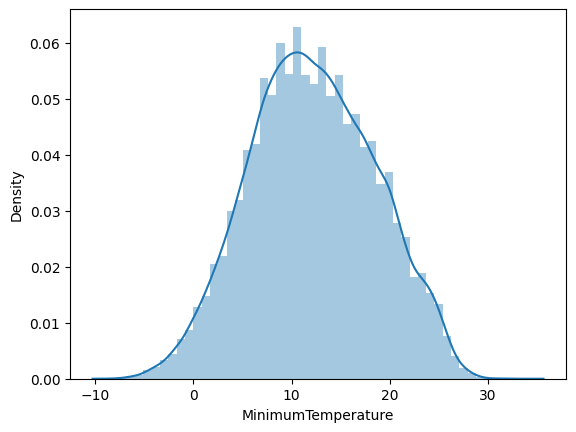

In [77]:
sns.distplot(data['MinimumTemperature'])

In [78]:
data['MinimumTemperature'].describe()

count    143975.000000
mean         12.194034
std           6.398495
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.900000
max          33.900000
Name: MinimumTemperature, dtype: float64

In [79]:
data['MinimumTemperature'].isna().sum()

1485

In [80]:
data.drop(['Date','Location'],axis =1,inplace= True)

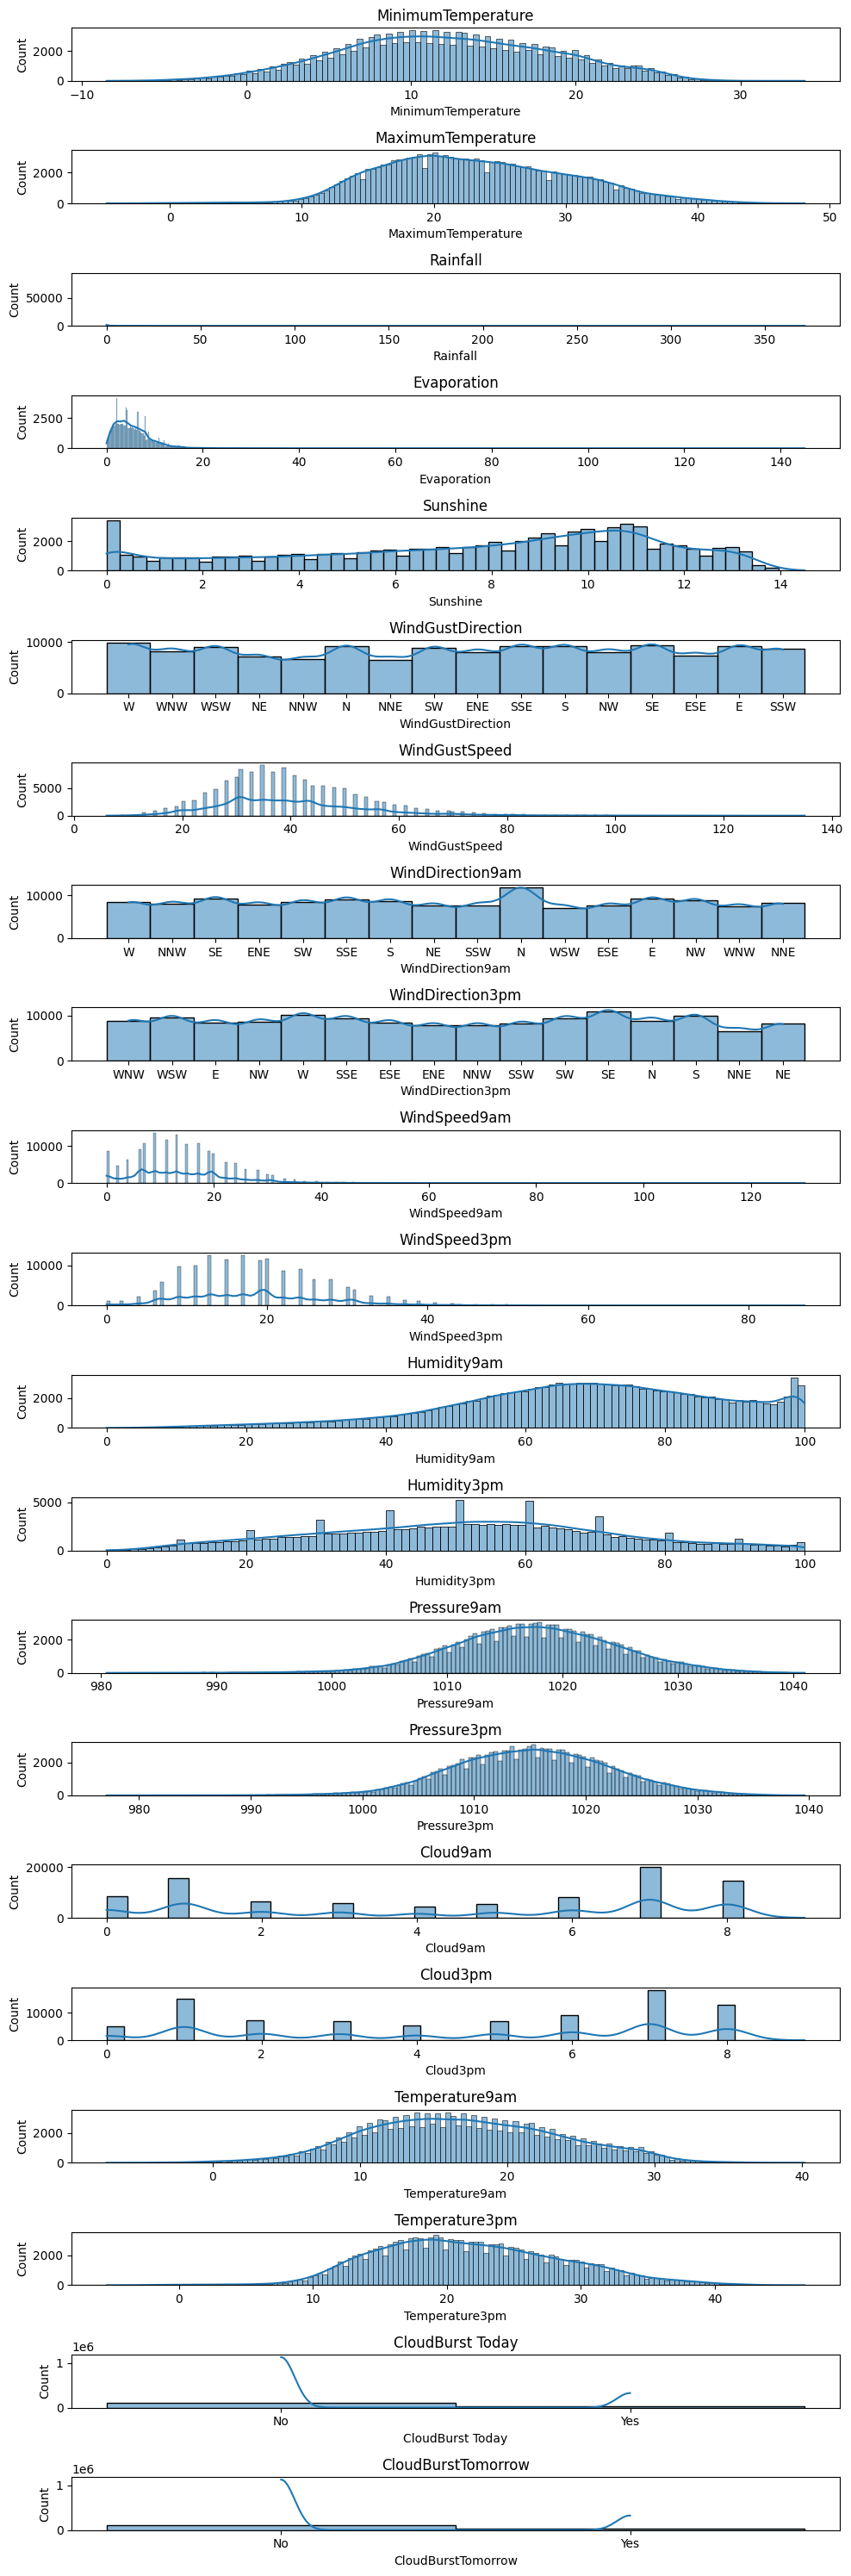

In [81]:
fig, ax = plt.subplots(21, 1, figsize=(10,30))
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

In [82]:
data.columns

Index(['MinimumTemperature', 'MaximumTemperature', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDirection', 'WindGustSpeed', 'WindDirection9am',
       'WindDirection3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temperature9am', 'Temperature3pm', 'CloudBurst Today',
       'CloudBurstTomorrow'],
      dtype='object')

Analysing the distribution and selecting the suitable null replacable values.

In [83]:
mean_distri_col=['MinimumTemperature','MaximumTemperature','Sunshine','Temperature9am','Temperature3pm','Humidity3pm','Cloud9am','Cloud3pm']
mode_disti_col = ['Pressure3pm','Pressure9am','Humidity9am','WindSpeed9am','WindSpeed3pm','WindGustSpeed','Evaporation']

Filling the missing values of dataset

In [84]:
for col in mean_distri_col:
  data[col].fillna(data[col].mean(),inplace=True)
for col in mode_disti_col:
    mode_value = data[col].mode().iloc[0]
    data[col].fillna(mode_value, inplace=True)

In [85]:
data['Rainfall'].fillna(data['Rainfall'].median(),inplace=True)

Filling Categorical Data

In [86]:
cate_data = ["WindGustDirection", "WindDirection9am", "WindDirection3pm"]
for i in cate_data:
    data[i] = pd.Categorical(data[i].astype('category').cat.codes.interpolate(method='linear', limit_direction='both', limit_area='inside')).astype('category')

Dropping the remaining missing values which belong to our predictions class

In [87]:
data.dropna(inplace =True,axis=0)

In [88]:
data.isna().sum()

MinimumTemperature    0
MaximumTemperature    0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDirection     0
WindGustSpeed         0
WindDirection9am      0
WindDirection3pm      0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temperature9am        0
Temperature3pm        0
CloudBurst Today      0
CloudBurstTomorrow    0
dtype: int64

Handling outliers using Percentile

In [89]:
percentile_col = ['MinimumTemperature','MaximumTemperature','Temperature9am','Temperature3pm','Humidity3pm']
for i in percentile_col:
  min_limit = data[i].quantile(0.01)
  max_limit = data[i].quantile(0.99)
  data[i] = np.where(data[i] > max_limit,max_limit,np.where(data[i]<min_limit,min_limit,data[i]))

In [90]:
Z_score = ['Cloud9am','Cloud3pm']
for i in Z_score:
  mean = data[i].mean()
  std  = data[i].std()
  z_score = (data[i]-mean)/std
  min_limit = mean - 3*std
  max_limit = mean + 3*std
  data[i] = np.where(data[i]>max_limit,z_score,np.where(data[i]<min_limit,z_score,data[i]))

In [91]:
quantile_col = ['WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm']
for i in quantile_col:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  IQR = q3-q1
  min_limit = q1-1.5*IQR
  max_limit = q3+1.5*IQR
  print(min_limit,max_limit)
  data[i] = np.where(data[i]>max_limit,max_limit,np.where(data[i]<min_limit,min_limit,data[i]))

8.5 68.5
-11.0 37.0
-3.5 40.5
16.5 124.5
1001.0500000000001 1034.25
998.4000000000001 1032.0


In [92]:
data.describe()

,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,12.190035,23.256013,2.349974,4.848166,7.621352,39.333475,13.864441,18.443571,69.190873,51.460117,1017.559365,1015.279661,4.437254,4.503505,16.991019,21.712713
std,6.332597,6.965592,8.465173,3.261531,2.741407,12.252292,8.564687,8.476578,19.100532,20.447048,6.598679,6.554994,2.284266,2.109464,6.389619,6.733559
min,-1.800000,9.200000,0.000000,0.000000,0.000000,8.500000,0.000000,0.000000,16.500000,9.000000,1001.050000,998.400000,0.000000,0.000000,2.600000,7.800000
25%,7.600000,17.900000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.700000,0.000000,4.000000,7.611178,37.000000,13.000000,17.000000,70.000000,51.539116,1016.700000,1015.300000,4.447461,4.509930,16.800000,21.300000
75%,16.800000,28.200000,0.800000,5.400000,8.700000,46.000000,19.000000,24.000000,84.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000
max,25.800000,40.100000,371.000000,145.000000,14.500000,68.500000,37.000000,40.500000,100.000000,97.000000,1034.250000,1032.000000,9.000000,9.000000,31.200000,38.500000


Standardizing the data

In [93]:
X = data.loc[:, ~data.columns.isin(['CloudBurst Today', 'CloudBurstTomorrow'])]
y = data['CloudBurstTomorrow']

In [94]:
X_cate_data = ["WindGustDirection", "WindDirection9am", "WindDirection3pm"]
X_num_data = list(data.loc[:, ~data.columns.isin(X_cate_data + ['CloudBurst Today', 'CloudBurstTomorrow'])].columns)

In [95]:
X_num_data

['MinimumTemperature',
 'MaximumTemperature',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temperature9am',
 'Temperature3pm']

Spillting the data

In [96]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

Data Preprocessing

In [97]:
for i in cate_data:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

In [98]:
X_train[X_num_data] = scaler.fit_transform(X_train[X_num_data])
X_test[X_num_data] = scaler.transform(X_test[X_num_data])

In [99]:
X_train

,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,WindDirection3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm
123230,0.206364,0.392962,-0.276333,0.293307,1.817241,13,-0.517076,2,13,-0.802083,-0.171070,-0.898970,-0.169284,0.173197,0.140518,-1.942274,-1.658068,0.688796,0.457629
71385,0.600765,0.966244,-0.276333,1.952560,-1.433403,4,0.299125,4,4,2.002365,-0.879629,-2.364305,-1.438852,0.597311,0.689377,0.246844,1.657936,1.345469,1.198981
44749,1.074047,0.435958,-0.276333,-0.259777,-0.004881,5,0.135885,7,6,-0.802083,-0.407256,0.828032,1.344431,-0.084301,-0.316865,0.004929,0.004638,0.751336,0.398321
94829,0.395676,0.564947,-0.276333,0.354761,0.758042,1,0.870466,12,1,-0.100971,0.419396,-1.108304,-0.218113,0.521576,0.521670,-0.190980,0.236791,0.735701,0.605900
27344,-1.024168,-1.111904,-0.276333,-0.259777,-0.004881,3,-2.312719,0,16,-1.620047,-1.470094,1.560699,0.563159,-1.371789,-1.521305,0.004929,0.004638,-1.281223,-0.995420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114114,0.506109,0.220977,-0.276333,-0.259777,-0.004881,11,0.707226,11,11,1.418105,1.364141,-0.061636,0.319011,0.158050,0.353963,0.004929,0.004638,0.657525,0.072126
124103,-1.418569,-1.111904,0.799903,-0.259777,-0.004881,12,0.299125,12,12,0.132733,0.891768,0.147698,1.149113,-0.175182,0.003303,0.004929,0.004638,-0.765266,-1.499540
107412,-0.077605,0.048992,-0.276333,-0.259777,-0.004881,10,-0.190595,9,10,0.950697,0.419396,0.095364,-0.852897,0.218638,0.049041,0.004929,0.004638,-0.218039,0.250051
136480,1.263359,1.611187,-0.276333,0.969299,1.744192,10,-0.190595,3,3,1.418105,-0.171070,-1.317637,-1.341193,-0.720471,-0.880970,-1.504451,-2.131783,1.439279,1.762409


In [100]:
y_train = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test.astype(str))

In [101]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((112629, 19), (112629,), (28158, 19), (28158,))

Improving the accuracy by handling the outliers

<Axes: >

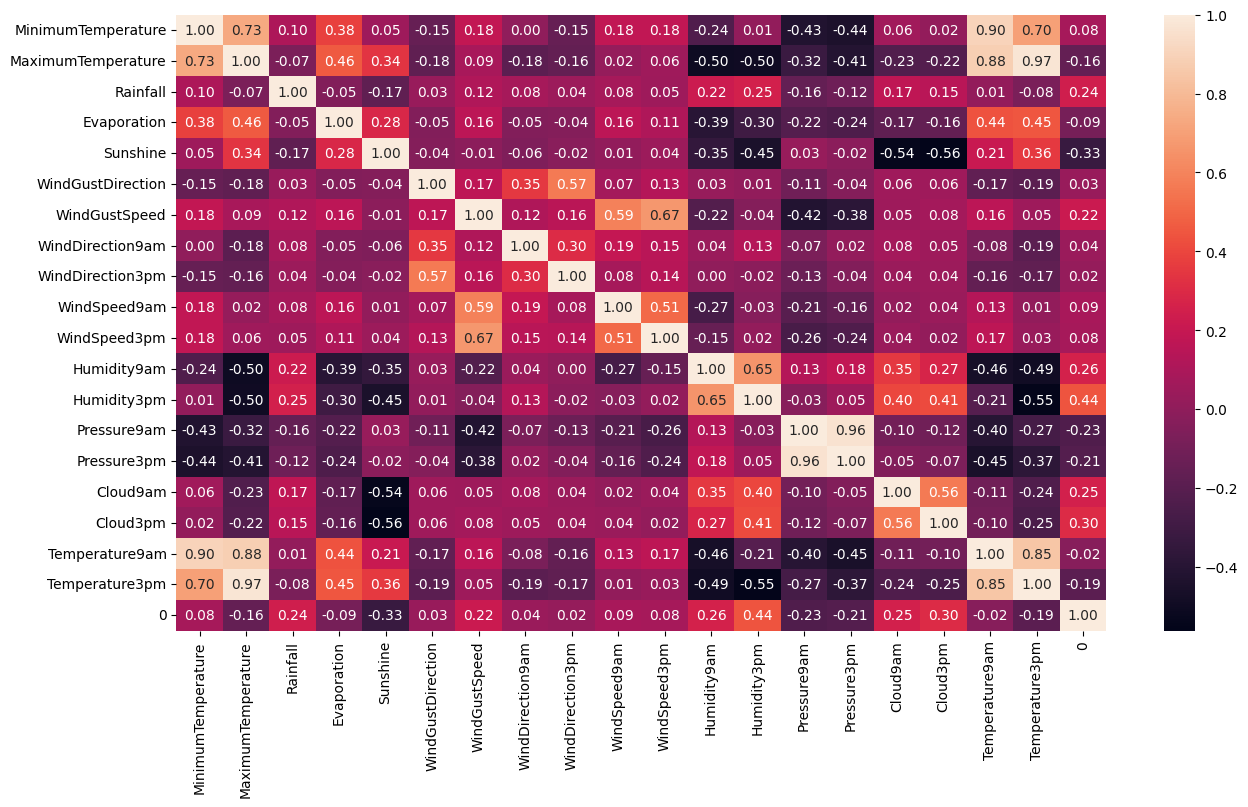

In [102]:
X_combined = pd.concat([X_train, X_test], axis=0)
X_combined.reset_index(drop=True, inplace=True)
Y_combined = pd.concat([pd.Series(y_train), pd.Series(y_test_encoded)], axis=0)
Y_combined.reset_index(drop=True, inplace=True)
plt.figure(figsize=(15,8))

res=pd.concat([X_combined,Y_combined],axis=1)
sns.heatmap(res.corr(),annot=True,fmt='.2f')

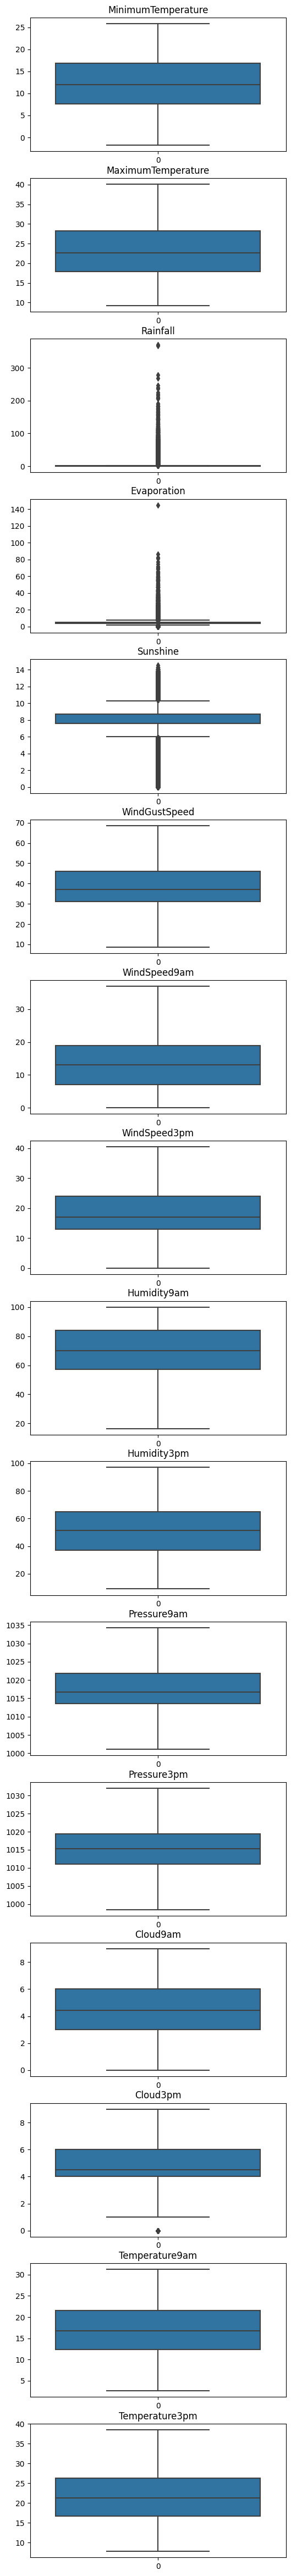

In [103]:
fig, ax = plt.subplots(16, 1,figsize=(6, 60))

for i, col in enumerate(X_num_data):
    sns.boxplot(data[col], ax=ax[i])
    ax[i].set_title(col)

plt.show()

Prediction of Cloud-Burst

In [104]:
NB.fit(X_train,y_train)
DC.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [105]:
NB_pred=NB.predict(X_test)
DC_pred=DC.predict(X_test)

In [106]:
print(classification_report(y_test_encoded, DC_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     21897
           1       0.52      0.54      0.53      6261

    accuracy                           0.79     28158
   macro avg       0.69      0.70      0.70     28158
weighted avg       0.79      0.79      0.79     28158



In [107]:
print(f'Accuracy score of Naive-Baye       {accuracy_score(NB_pred,y_test_encoded)*100}%')
print(f'Accuracy score of Decision-Tree    {accuracy_score(DC_pred,y_test_encoded)*100}%')

Accuracy score of Naive-Baye       81.1989487889765%
Accuracy score of Decision-Tree    78.72007955110448%


 Building an ANN

In [108]:
model = models.Sequential(
    [layers.Dense(32,activation='relu',input_shape=(19,)),
    layers.Dense(16,activation='softmax'),
    layers.Dense(8,activation='relu'),
    layers.Dense(2,activation='sigmoid')]
)

In [109]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [110]:
history = model.fit(X_train, y_train, batch_size=32, verbose=1, epochs=50, validation_split=0.3)

Epoch 1/50
2464/2464 [==============================] - 9s 3ms/step - loss: 0.3841 - accuracy: 0.8341 - val_loss: 0.3652 - val_accuracy: 0.8397
Epoch 2/50
2464/2464 [==============================] - 10s 4ms/step - loss: 0.3552 - accuracy: 0.8457 - val_loss: 0.3537 - val_accuracy: 0.8484
Epoch 3/50
2464/2464 [==============================] - 8s 3ms/step - loss: 0.3497 - accuracy: 0.8470 - val_loss: 0.3545 - val_accuracy: 0.8479
Epoch 4/50
2464/2464 [==============================] - 8s 3ms/step - loss: 0.3472 - accuracy: 0.8485 - val_loss: 0.3487 - val_accuracy: 0.8497
Epoch 5/50
2464/2464 [==============================] - 9s 4ms/step - loss: 0.3450 - accuracy: 0.8496 - val_loss: 0.3481 - val_accuracy: 0.8508
Epoch 6/50
2464/2464 [==============================] - 7s 3ms/step - loss: 0.3435 - accuracy: 0.8504 - val_loss: 0.3453 - val_accuracy: 0.8516
Epoch 7/50
2464/2464 [==============================] - 10s 4ms/step - loss: 0.3417 - accuracy: 0.8516 - val_loss: 0.3487 - val_accurac

In [117]:
print('The Training accuracy of ANN is ',history.history['accuracy'][-1]*100,"%")
print('The Testing accuracy of ANN is  ',history.history['val_accuracy'][-1]*100,"%")

The Training accuracy of ANN is  86.04007959365845 %
The Testing accuracy of ANN is   85.22300124168396 %


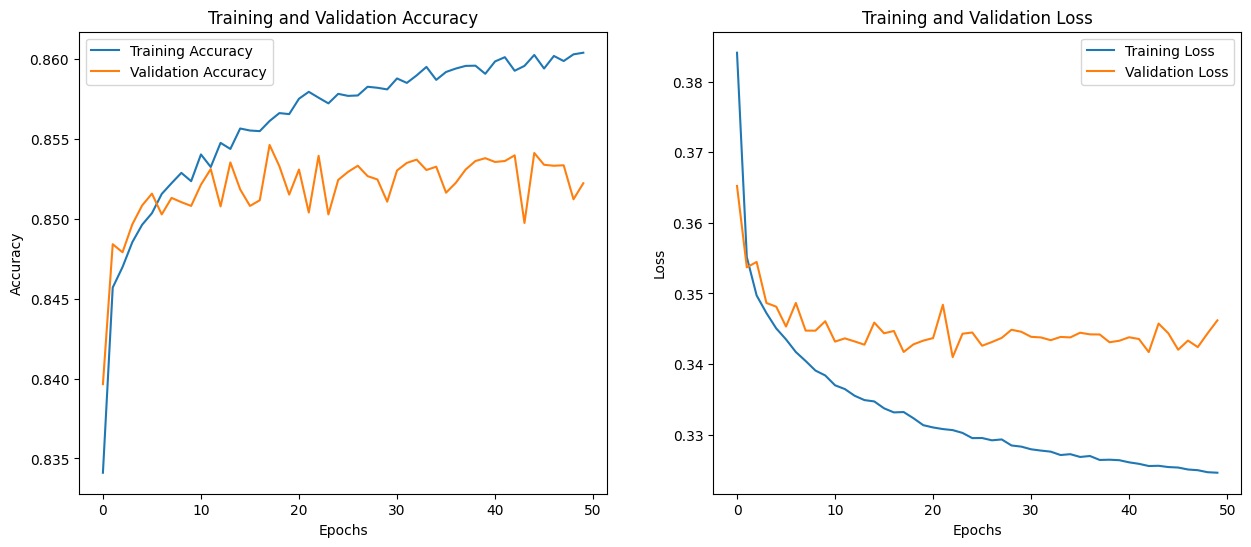

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # Create subplots with 1 row and 2 columns

# Plot accuracy in the first subplot (ax[0])
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot loss in the second subplot (ax[1])
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.show()